In [1]:
# All imports and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create set of random longitudes and latitudes
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
longs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_longs = zip(lats, longs)
lat_longs

In [3]:
# Add lat_longs to a list to unpack data
coordinates = list(lat_longs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5809be67b32647cbfb2afe6fa269d78d


In [6]:
# Create empty list to hold city weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("-----------------------------")

# Creating counters
record_count = 1
set_count = 1

# Looping through cities
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run city API request
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | chapais
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | asau
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | revda
Processing Record 13 of Set 1 | huarmey
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | parana
Processing Record 16 of Set 1 | malartic
Processing Record 17 of Set 1 | maltahohe
Processing Record 18 of Set 1 | sao gabriel da cachoeira
Processing Record 19 of Set 1 | taolanaro


Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | port blair
Processing Record 38 of Set 4 | buraydah
Processing Record 39 of Set 4 | vao
Processing Record 40 of Set 4 | santa maria
Processing Record 41 of Set 4 | changji
Processing Record 42 of Set 4 | khasan
Processing Record 43 of Set 4 | xuddur
Processing Record 44 of Set 4 | erenhot
Processing Record 45 of Set 4 | fairbanks
Processing Record 46 of Set 4 | kurilsk
Processing Record 47 of Set 4 | salamiyah
Processing Record 48 of Set 4 | mahabaleshwar
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | bolshaya rechka
Processing Record 3 of Set 5 | plettenberg bay
Processing Record 4 of Set 5 | henties bay
Processing Record 5 of Set 5 | lolua
City not found. Skipping...
Processing Record 6 of Set 5 | ahuimanu
Processing Record 7 of Set 5 | aitape
Processing Record 8 of Set 5 | andra
Processing Record 9 of Set 5 |

Processing Record 26 of Set 8 | southern pines
Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | aksu
Processing Record 29 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 8 | luanda
Processing Record 31 of Set 8 | ossora
Processing Record 32 of Set 8 | iskateley
Processing Record 33 of Set 8 | ewa beach
Processing Record 34 of Set 8 | nizhniy tsasuchey
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | miri
Processing Record 37 of Set 8 | hvolsvollur
Processing Record 38 of Set 8 | tarudant
City not found. Skipping...
Processing Record 39 of Set 8 | zhuozhou
City not found. Skipping...
Processing Record 40 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 41 of Set 8 | pitimbu
Processing Record 42 of Set 8 | severnyy
Processing Record 43 of Set 8 | havelock
Processing Record 44 of Set 8 | mananjary
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | hasaki
Processing Record 47 of Set

City not found. Skipping...
Processing Record 15 of Set 12 | faro
Processing Record 16 of Set 12 | kuytun
Processing Record 17 of Set 12 | asahi
Processing Record 18 of Set 12 | kolo
Processing Record 19 of Set 12 | jaru
Processing Record 20 of Set 12 | kegayli
City not found. Skipping...
Processing Record 21 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 22 of Set 12 | haicheng
Processing Record 23 of Set 12 | necochea
Processing Record 24 of Set 12 | marsa matruh
Processing Record 25 of Set 12 | asfi
Processing Record 26 of Set 12 | talaya
Processing Record 27 of Set 12 | buariki
City not found. Skipping...
Processing Record 28 of Set 12 | corinto
Processing Record 29 of Set 12 | salantai
Processing Record 30 of Set 12 | vila velha
Processing Record 31 of Set 12 | bargal
City not found. Skipping...
Processing Record 32 of Set 12 | rogun
City not found. Skipping...
Processing Record 33 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 12

In [7]:
print(len(city_data))

561


In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,75.25,78,40,8.05,CK,2021-09-16 08:10:38
1,Chapais,49.7834,-74.8492,46.18,98,21,4.50,CA,2021-09-16 08:20:35
2,Jamestown,42.0970,-79.2353,57.09,99,90,1.99,US,2021-09-16 08:11:21
3,Khatanga,71.9667,102.5000,35.38,94,100,12.55,RU,2021-09-16 08:18:29
4,Nikolskoye,59.7035,30.7861,47.01,82,100,3.65,RU,2021-09-16 08:13:35


In [9]:
new_column_order = ["City", "Country", "Date", 
                    "Lat", "Lng", "Max Temp", 
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-09-16 08:10:38,-21.2078,-159.7750,75.25,78,40,8.05
1,Chapais,CA,2021-09-16 08:20:35,49.7834,-74.8492,46.18,98,21,4.50
2,Jamestown,US,2021-09-16 08:11:21,42.0970,-79.2353,57.09,99,90,1.99
3,Khatanga,RU,2021-09-16 08:18:29,71.9667,102.5000,35.38,94,100,12.55
4,Nikolskoye,RU,2021-09-16 08:13:35,59.7035,30.7861,47.01,82,100,3.65


In [10]:
# Create output file
output_data_file = "weather_data/cities.csv"

#Export to .csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [11]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


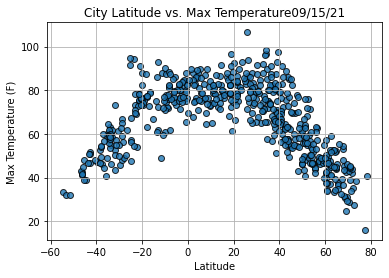

In [12]:
# Import time module
import time

# Build scatterplot
plt.scatter(lats, 
            max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

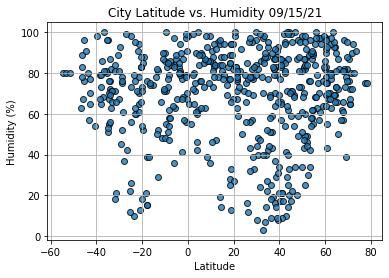

In [13]:
# Humidity Scatterplot
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


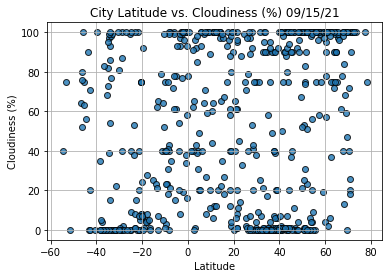

In [14]:
# Cloudiness Scatterplot
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


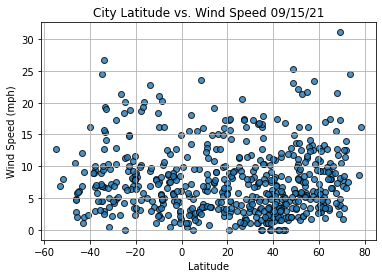

In [15]:
# Windspeed Scatterplot
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import module
from scipy.stats import linregress

# Create function to perform linear regression on weather data parameters
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Northern and Southern Dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

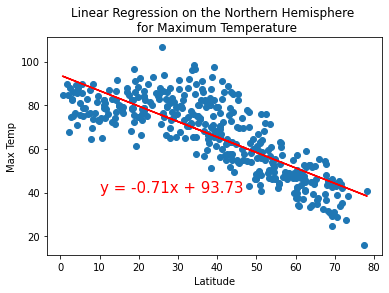

In [18]:
# Linear Regression for northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                      'Max Temp', (10, 40))


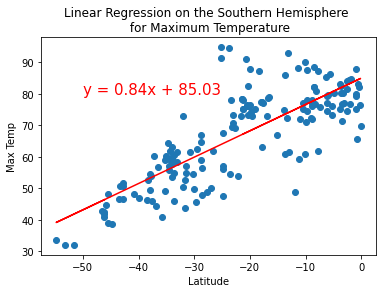

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,80))

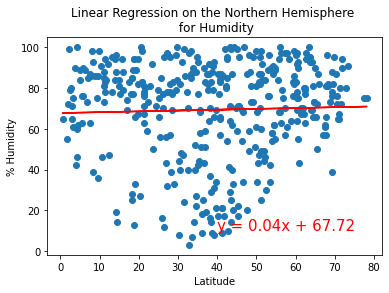

In [20]:
# Percent Humidity Graphs Northern
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Humidity",
                      "% Humidity",(40,10))

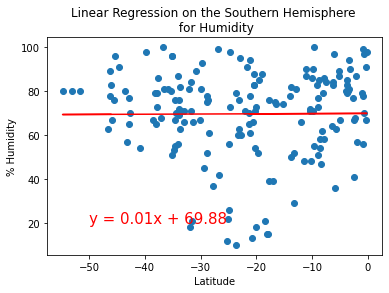

In [21]:
# Percent Humidity Graphs Southern
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Humidity",
                      "% Humidity",(-50,20))

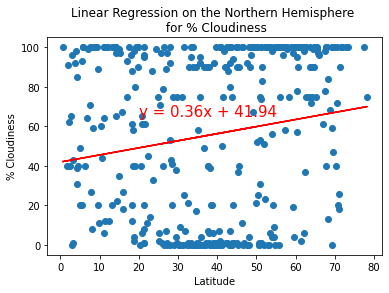

In [22]:
# Percent Cloudiness Graphs Northern Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                      "% Cloudiness",(20,65))

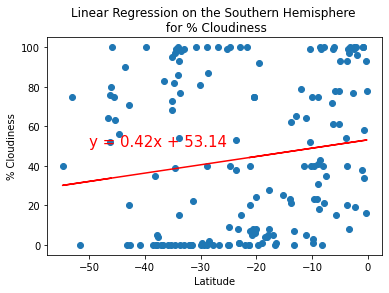

In [23]:
# Percent Cloudiness Graphs Southern Hemi
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                      "% Cloudiness",(-50,50))

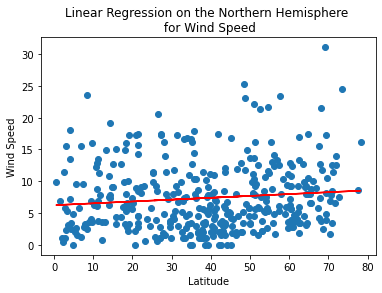

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

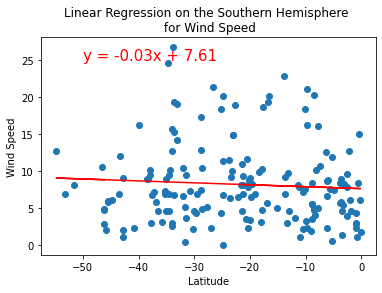

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-50,25))